# CHE 1148 : Assignment-5 

## **PART-1 Partial dependency plots**

From previous assignment my best Random Forest model was for annual features. 

First we import relevant packages.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree


In [2]:
import warnings
warnings.filterwarnings("ignore")

Importing annual table

In [3]:
annual_table = pd.read_csv("/Users/AyeshaPatnaik/Downloads/UofT/Sem2_Winter-23/CHE1148/Assignmnet-4/annual_table.csv")
annual_table

,customer_id,ann_txn_amt_ave_2011,ann_txn_amt_ave_2012,ann_txn_amt_ave_2013,ann_txn_amt_ave_2014,ann_txn_amt_ave_2015,ann_txn_amt_cnt_2011,ann_txn_amt_cnt_2012,ann_txn_amt_cnt_2013,ann_txn_amt_cnt_2014,...,cnt_2014_Tuesday,cnt_2014_Wednesday,cnt_2015_Friday,cnt_2015_Monday,cnt_2015_Saturday,cnt_2015_Sunday,cnt_2015_Thursday,cnt_2015_Tuesday,cnt_2015_Wednesday,response
0,CS1112,70.666667,67.400000,70.666667,70.666667,39.000000,3,5,3,3,...,1,1,0,0,0,0,0,0,1,0
1,CS1113,81.333333,74.800000,85.200000,56.500000,73.333333,3,5,5,4,...,3,0,0,2,0,0,0,0,1,0
2,CS1114,85.200000,75.000000,70.400000,70.833333,79.000000,5,2,5,6,...,1,1,0,0,0,0,1,0,0,1
3,CS1115,87.000000,67.571429,79.571429,78.250000,55.000000,3,7,7,4,...,0,2,0,0,0,0,1,0,0,1
4,CS1116,58.750000,76.666667,59.000000,66.600000,0.000000,4,3,1,5,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6879,CS8996,31.000000,33.666667,41.500000,56.000000,0.000000,2,3,2,6,...,1,2,0,0,0,0,0,0,0,0
6880,CS8997,45.000000,39.500000,35.166667,42.000000,0.000000,2,4,6,2,...,0,0,0,0,0,0,0,0,0,0
6881,CS8998,64.000000,54.400000,47.000000,32.500000,0.000000,2,5,2,4,...,1,1,0,0,0,0,0,0,0,0
6882,CS8999,52.000000,25.250000,28.000000,21.000000,0.000000,3,4,3,2,...,0,2,0,0,0,0,0,0,0,0


**Random Forest Modelling**

The best random forest model has max_depth of 4 and ccp_alpha of 0.006 that resulted in 75% accuracy and 57% recall on the annual data. So we'll proceed with the same data.

In [4]:
X_annual = annual_table.drop(["response"],axis=1)
X_annual = X_annual.drop(["customer_id"],axis=1)

In [5]:
X_annual #dataframe for input X annual data

,ann_txn_amt_ave_2011,ann_txn_amt_ave_2012,ann_txn_amt_ave_2013,ann_txn_amt_ave_2014,ann_txn_amt_ave_2015,ann_txn_amt_cnt_2011,ann_txn_amt_cnt_2012,ann_txn_amt_cnt_2013,ann_txn_amt_cnt_2014,ann_txn_amt_cnt_2015,...,cnt_2014_Thursday,cnt_2014_Tuesday,cnt_2014_Wednesday,cnt_2015_Friday,cnt_2015_Monday,cnt_2015_Saturday,cnt_2015_Sunday,cnt_2015_Thursday,cnt_2015_Tuesday,cnt_2015_Wednesday
0,70.666667,67.400000,70.666667,70.666667,39.000000,3,5,3,3,1,...,1,1,1,0,0,0,0,0,0,1
1,81.333333,74.800000,85.200000,56.500000,73.333333,3,5,5,4,3,...,0,3,0,0,2,0,0,0,0,1
2,85.200000,75.000000,70.400000,70.833333,79.000000,5,2,5,6,1,...,0,1,1,0,0,0,0,1,0,0
3,87.000000,67.571429,79.571429,78.250000,55.000000,3,7,7,4,1,...,2,0,2,0,0,0,0,1,0,0
4,58.750000,76.666667,59.000000,66.600000,0.000000,4,3,1,5,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6879,31.000000,33.666667,41.500000,56.000000,0.000000,2,3,2,6,0,...,1,1,2,0,0,0,0,0,0,0
6880,45.000000,39.500000,35.166667,42.000000,0.000000,2,4,6,2,0,...,0,0,0,0,0,0,0,0,0,0
6881,64.000000,54.400000,47.000000,32.500000,0.000000,2,5,2,4,0,...,0,1,1,0,0,0,0,0,0,0
6882,52.000000,25.250000,28.000000,21.000000,0.000000,3,4,3,2,0,...,0,0,2,0,0,0,0,0,0,0


In [6]:
y_annual=annual_table.loc[:,["response"]]
y_annual #datframe for output y annual data

,response
0,0
1,0
2,1
3,1
4,1
...,...
6879,0
6880,0
6881,0
6882,0


In [7]:
#Splitting annual data into train and test with 2/3rd in test data and random state 1147 (to maintain consistency with previous assignment model)
X_train_annual, X_test_annual, y_train_annual, y_test_annual = train_test_split(X_annual, y_annual, test_size=2/3, random_state=1147) 

In [8]:
#checking split between train and test
print(X_train_annual.shape, X_test_annual.shape)

(2294, 75) (4590, 75)


In [9]:
#resetting index of training set for easier access later
X_train_annual.reset_index(drop=True, inplace=True)
X_train_annual

,ann_txn_amt_ave_2011,ann_txn_amt_ave_2012,ann_txn_amt_ave_2013,ann_txn_amt_ave_2014,ann_txn_amt_ave_2015,ann_txn_amt_cnt_2011,ann_txn_amt_cnt_2012,ann_txn_amt_cnt_2013,ann_txn_amt_cnt_2014,ann_txn_amt_cnt_2015,...,cnt_2014_Thursday,cnt_2014_Tuesday,cnt_2014_Wednesday,cnt_2015_Friday,cnt_2015_Monday,cnt_2015_Saturday,cnt_2015_Sunday,cnt_2015_Thursday,cnt_2015_Tuesday,cnt_2015_Wednesday
0,88.000000,75.000000,64.857143,84.400000,0.0,2,5,7,5,0,...,4,0,0,0,0,0,0,0,0,0
1,103.000000,58.600000,76.200000,53.428571,0.0,1,5,5,7,0,...,2,0,0,0,0,0,0,0,0,0
2,73.142857,82.333333,71.333333,55.500000,72.0,7,3,3,4,1,...,1,0,1,0,0,0,0,0,1,0
3,65.250000,72.200000,60.200000,62.500000,82.5,4,5,5,4,2,...,1,2,0,1,0,1,0,0,0,0
4,68.000000,73.500000,70.000000,59.500000,82.0,6,4,7,2,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2289,61.000000,86.000000,62.428571,73.600000,53.5,2,5,7,5,2,...,1,1,0,0,0,1,0,1,0,0
2290,57.500000,71.333333,61.222222,57.000000,0.0,4,6,9,1,0,...,0,0,0,0,0,0,0,0,0,0
2291,67.333333,79.875000,74.000000,64.500000,65.5,3,8,10,4,4,...,0,0,0,1,0,1,0,0,1,1
2292,67.250000,85.000000,55.000000,63.666667,72.0,4,3,3,6,1,...,0,1,0,0,0,0,0,0,1,0


In [10]:
#resetting index of training set response for easier access later
y_train_annual.reset_index(drop=True, inplace=True)
y_train_annual

,response
0,0
1,0
2,0
3,0
4,0
...,...
2289,0
2290,0
2291,0
2292,0


We had established in earlier assignments that the annual data is imbalanced with higher amount of negatove response than posiitve response. Therefore, we add a "balanced" class weight to the model.

In [11]:
#Training random forest model
estimator_annual_rf = RandomForestClassifier(random_state=0, max_depth = 4, ccp_alpha= 0.006,class_weight="balanced")
model_annual_rf = estimator_annual_rf.fit(X_train_annual, y_train_annual)

**Calculating Feature Importances**

In [12]:
# Calculate feature importances
importances_annual_rf = model_annual_rf.feature_importances_
importances_annual_rf

array([0.01529507, 0.01760348, 0.04543614, 0.04141924, 0.00337408,
       0.00037149, 0.00314093, 0.02753357, 0.13208321, 0.00149079,
       0.00826955, 0.02094063, 0.03186963, 0.05078992, 0.0048053 ,
       0.01090231, 0.0165167 , 0.01883679, 0.02277695, 0.00502096,
       0.00135909, 0.00606982, 0.01654614, 0.05219146, 0.00580141,
       0.00733376, 0.01657061, 0.01758603, 0.01649431, 0.00164337,
       0.00886292, 0.00743963, 0.07030977, 0.15850006, 0.00547503,
       0.00291016, 0.01073096, 0.02243709, 0.0170377 , 0.00327568,
       0.        , 0.0004191 , 0.        , 0.00062381, 0.00091185,
       0.00080504, 0.        , 0.        , 0.00146911, 0.00252233,
       0.        , 0.00043099, 0.00233146, 0.00105951, 0.0008396 ,
       0.00264361, 0.00047114, 0.00604562, 0.00378441, 0.00203075,
       0.        , 0.00062407, 0.00161775, 0.00171516, 0.01375133,
       0.00740294, 0.00323771, 0.01145161, 0.00335397, 0.        ,
       0.00043131, 0.        , 0.        , 0.00083093, 0.00214

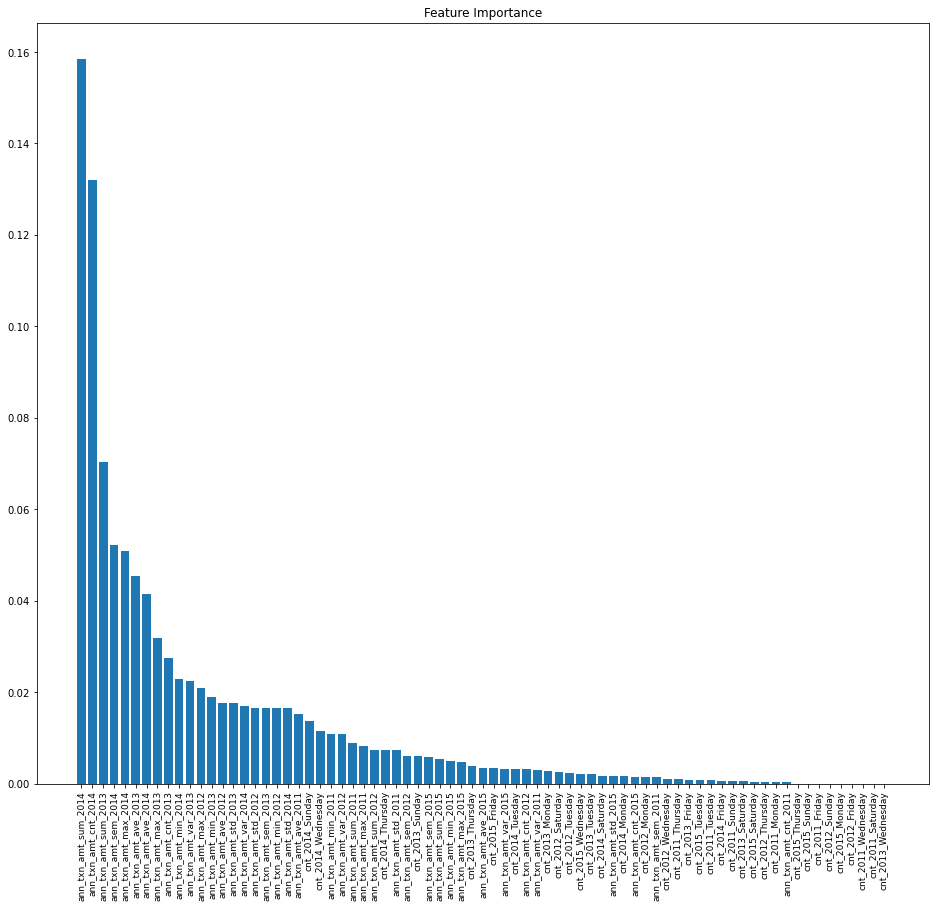

In [13]:
# Sort feature importances in descending order
indices_annual_rf = np.argsort(importances_annual_rf)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X_annual.columns[i] for i in indices_annual_rf]

# Create plot
plt.figure(figsize=(16,14))
# Create plot title
plt.title("Feature Importance")
# Add bars
plt.bar(range(X_annual.shape[1]), importances_annual_rf[indices_annual_rf])
# Add feature names as x-axis labels
plt.xticks(range(X_annual.shape[1]), names, rotation=90)
plt.tick_params(axis='x', which='major', labelsize=9)
# Show plot
plt.show()

Therefore the top 5 features in my best random forest model are:
1. "ann_txn_amt_sum_2014" 
2. "ann_txn_amt_cnt_2014"
3. "ann_txn_amt_sum_2013"
4. "amt_txn_amt_sem_2014"
5. "ann_txn_amt_max_2014"

Hence we are going to plot partial dependency plot for each of them.

**Creating a function to do a single tree model to decide bins**

In [14]:
def binning(X,y):
    
    #training decision tree model
    dt = DecisionTreeClassifier(max_depth = 2, min_samples_split = 2, random_state=1147, criterion='entropy')
    estimator = dt.fit(X,y)
    
    #plotting
    fig = plt.figure(figsize=(30,12))

    fig = plt.subplot(121)
    axs = plot_tree(estimator, filled=True, feature_names = list(X.columns), class_names=['Negative Response', 'Positive Response'],rounded = True, precision = 2, node_ids=True)


    plt.show()
    
    return 
    
    

## **1. PDP for 1st feature: "ann_txn_amt_sum_2014"**

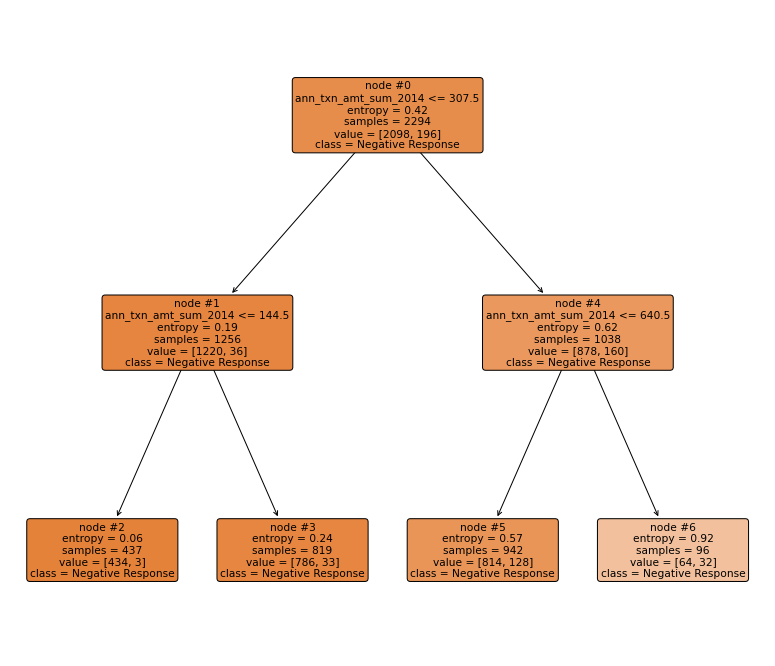

In [15]:
#single tree model to decide bin edges
binning(X_train_annual[["ann_txn_amt_sum_2014"]],y_train_annual["response"])

From the above tree model, I decide on the following bins:
1. Less than 144.5
2. Between 144.5 and 307.5
3. Between 307.5 and 640.5
4. Greater than 640.5

### **Population Distribution Calculation for 1st feature**

In [16]:
#empty list to contain population distribution for each bin bucket
pd_1 = []
pd_2 = []
pd_3 = []
pd_4 = []

#empty list to contain corresponding responses for each bin bucket
responses_1 = []
responses_2 = []
responses_3 = []
responses_4 = []

for i in range(len(X_train_annual)):
    if X_train_annual['ann_txn_amt_sum_2014'][i] <=144.5:
        pd_1.append(X_train_annual['ann_txn_amt_sum_2014'][i])
        responses_1.append(y_train_annual['response'][i])
    elif X_train_annual['ann_txn_amt_sum_2014'][i] >144.5 and X_train_annual['ann_txn_amt_sum_2014'][i] <=307.5:
        pd_2.append(X_train_annual['ann_txn_amt_sum_2014'][i])
        responses_2.append(y_train_annual['response'][i])
    elif X_train_annual['ann_txn_amt_sum_2014'][i] >307.5 and X_train_annual['ann_txn_amt_sum_2014'][i] <=640.5:
        pd_3.append(X_train_annual['ann_txn_amt_sum_2014'][i])
        responses_3.append(y_train_annual['response'][i])
    else:
        pd_4.append(X_train_annual['ann_txn_amt_sum_2014'][i])
        responses_4.append(y_train_annual['response'][i])

In [17]:
#Population distribution calculation in percentage

population_distribution_f1= [] #population distribution for feature 1 in percentage

pd_1_per = (len(pd_1)/len(X_train_annual)) * 100
population_distribution_f1.append(pd_1_per)
pd_2_per = (len(pd_2)/len(X_train_annual)) * 100
population_distribution_f1.append(pd_2_per)
pd_3_per = (len(pd_3)/len(X_train_annual)) * 100
population_distribution_f1.append(pd_3_per)
pd_4_per = (len(pd_4)/len(X_train_annual)) * 100
population_distribution_f1.append(pd_4_per)

population_distribution_f1

[19.049694856146466, 35.70183086312119, 41.06364428945074, 4.184829991281604]

### **Response Rate Calculation for 1st feature**

In [18]:
#collecting positive response for each brackets

r1 = []
r2 = []
r3 = []
r4 = []

for i in range(len(responses_1)):
    if responses_1[i] == 1:
        r1.append(responses_1[i])
        
for i in range(len(responses_2)):
    if responses_2[i] == 1:
        r2.append(responses_2[i])

for i in range(len(responses_3)):
    if responses_3[i] == 1:
        r3.append(responses_3[i])
        
for i in range(len(responses_4)):
    if responses_4[i] == 1:
        r4.append(responses_4[i])
        
        


In [19]:
# calculating response rate in percentage

response_rate_f1= [] #response rate for feature 1 in %

r_1 = (len(r1)/len(responses_1)) * 100
response_rate_f1.append(r_1)
r_2 = (len(r2)/len(responses_2)) * 100
response_rate_f1.append(r_2)
r_3 = (len(r3)/len(responses_3)) * 100
response_rate_f1.append(r_3)
r_4 = (len(r4)/len(responses_4)) * 100
response_rate_f1.append(r_4)

response_rate_f1

[0.6864988558352403, 4.029304029304029, 13.588110403397028, 33.33333333333333]

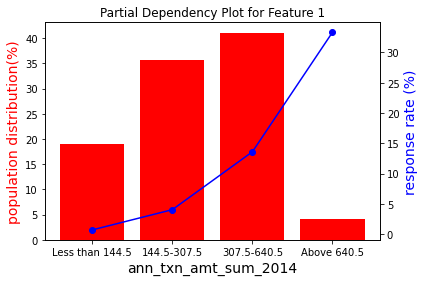

In [20]:
#Plotting the PDP Plot

xlabel = ['Less than 144.5','144.5-307.5','307.5-640.5','Above 640.5']

# create figure and axis objects with subplots()
fig,ax = plt.subplots()
plt.title("Partial Dependency Plot for Feature 1")
# make a plot
ax.bar(xlabel,
        population_distribution_f1,
        color="red")
# set x-axis label
ax.set_xlabel("ann_txn_amt_sum_2014", fontsize = 14)
# set y-axis label
ax.set_ylabel("population distribution(%)",
              color="red",
              fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(xlabel, response_rate_f1 ,color="blue",marker="o")
ax2.set_ylabel("response rate (%)",color="blue",fontsize=14)
plt.show()

# save the plot as a file
fig.savefig('PDP for feature 1.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

Interpretation:

From the above plot, we see that the response rate curve is increasing as the value of the feature increases. The response rate also increases with higher population distribution. This suggests that the higher the value of the feature, higher is the positive predicted outcome upto almost 30 %. Hence, the above plot clearly demonstrates that the feature "ann_txn_amt_sum_2014" i.e. the annual transaction sum in the year 2014 proves to have a very strong impact on the model predictions as was expected.

## **2. PDP for 2nd feature: "ann_txn_amt_cnt_2014"**

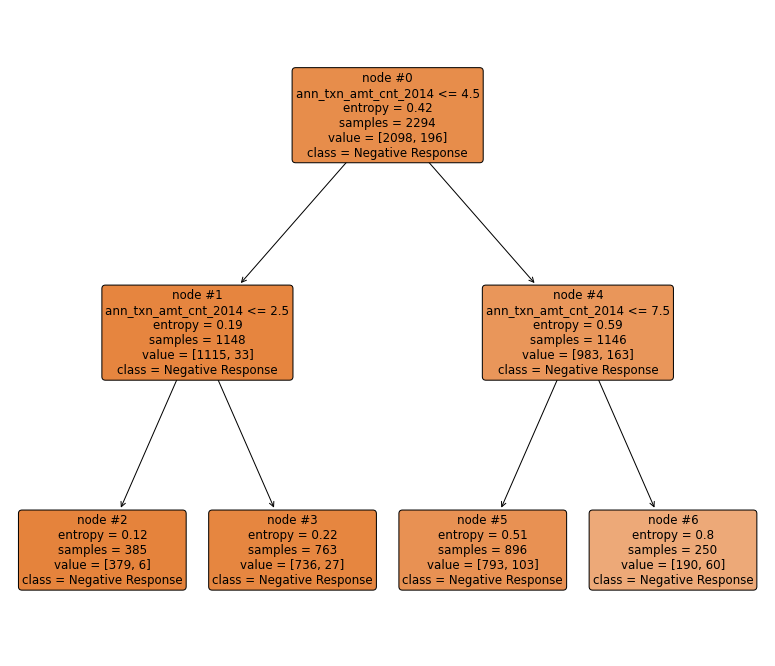

In [21]:
#single tree model to decide bin edges
binning(X_train_annual[["ann_txn_amt_cnt_2014"]],y_train_annual["response"])

From the above tree model, I decide on the following bins:
1. Less than 2.5
2. Between 2.5 and 4.5
3. Between 4.5 and 7.5
4. Greater than 7.5

### **Population Distribution Calculation for 2nd feature**

In [22]:
#empty list to contain population distribution for each bin bucket
pd_1_f2 = []
pd_2_f2 = []
pd_3_f2 = []
pd_4_f2 = []

#empty list to contain corresponding responses for each bin bucket
responses_1_f2 = []
responses_2_f2 = []
responses_3_f2 = []
responses_4_f2 = []

for i in range(len(X_train_annual)):
    if X_train_annual['ann_txn_amt_cnt_2014'][i] <=2.5:
        pd_1_f2.append(X_train_annual['ann_txn_amt_cnt_2014'][i])
        responses_1_f2.append(y_train_annual['response'][i])
    elif X_train_annual['ann_txn_amt_cnt_2014'][i] >2.5 and X_train_annual['ann_txn_amt_cnt_2014'][i] <=4.5:
        pd_2_f2.append(X_train_annual['ann_txn_amt_cnt_2014'][i])
        responses_2_f2.append(y_train_annual['response'][i])
    elif X_train_annual['ann_txn_amt_cnt_2014'][i] >4.5 and X_train_annual['ann_txn_amt_cnt_2014'][i] <=7.5:
        pd_3_f2.append(X_train_annual['ann_txn_amt_cnt_2014'][i])
        responses_3_f2.append(y_train_annual['response'][i])
    else:
        pd_4_f2.append(X_train_annual['ann_txn_amt_cnt_2014'][i])
        responses_4_f2.append(y_train_annual['response'][i])

In [23]:
#Population distribution calculation in percentage

population_distribution_f2= [] #population distribution for feature 2 in percentage

pd_1_per = (len(pd_1_f2)/len(X_train_annual)) * 100
population_distribution_f2.append(pd_1_per)
pd_2_per = (len(pd_2_f2)/len(X_train_annual)) * 100
population_distribution_f2.append(pd_2_per)
pd_3_per = (len(pd_3_f2)/len(X_train_annual)) * 100
population_distribution_f2.append(pd_3_per)
pd_4_per = (len(pd_4_f2)/len(X_train_annual)) * 100
population_distribution_f2.append(pd_4_per)

population_distribution_f2

[16.782911944202265, 33.26068003487359, 39.05841325196164, 10.897994768962512]

### **Response Rate Calculation for 2nd feature**

In [24]:
#collecting positive response for each brackets

r1 = []
r2 = []
r3 = []
r4 = []

for i in range(len(responses_1_f2)):
    if responses_1_f2[i] == 1:
        r1.append(responses_1_f2[i])
        
for i in range(len(responses_2_f2)):
    if responses_2_f2[i] == 1:
        r2.append(responses_2_f2[i])

for i in range(len(responses_3_f2)):
    if responses_3_f2[i] == 1:
        r3.append(responses_3_f2[i])
        
for i in range(len(responses_4_f2)):
    if responses_4_f2[i] == 1:
        r4.append(responses_4_f2[i])

In [25]:
# calculating response rate in percentage

response_rate_f2= [] #response rate for feature 2 in %

r_1 = (len(r1)/len(responses_1_f2)) * 100
response_rate_f2.append(r_1)
r_2 = (len(r2)/len(responses_2_f2)) * 100
response_rate_f2.append(r_2)
r_3 = (len(r3)/len(responses_3_f2)) * 100
response_rate_f2.append(r_3)
r_4 = (len(r4)/len(responses_4_f2)) * 100
response_rate_f2.append(r_4)

response_rate_f2

[1.5584415584415585, 3.5386631716906947, 11.495535714285714, 24.0]

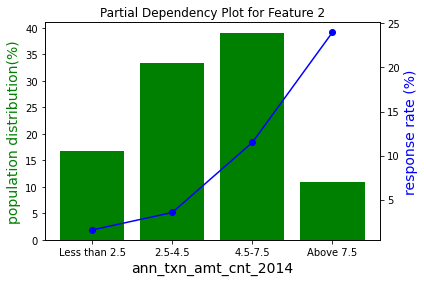

In [26]:
#Plotting the PDP Plot

xlabel_2 = ['Less than 2.5','2.5-4.5','4.5-7.5','Above 7.5']

# create figure and axis objects with subplots()
fig,ax = plt.subplots()
plt.title("Partial Dependency Plot for Feature 2")
# make a plot
ax.bar(xlabel_2,
        population_distribution_f2,
        color="green")
# set x-axis label
ax.set_xlabel("ann_txn_amt_cnt_2014", fontsize = 14)
# set y-axis label
ax.set_ylabel("population distribution(%)",
              color="green",
              fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(xlabel_2, response_rate_f2 ,color="blue",marker="o")
ax2.set_ylabel("response rate (%)",color="blue",fontsize=14)
plt.show()

# save the plot as a file
fig.savefig('PDP for feature 2.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

Interpretation:

For this feature "ann_txn_amt_cnt_2014" as well, the response rate increases significantly upto 12% with increase in feature value but then decreases in the last bucket. This suggests that higher values of the feature were associated with higher predicted outcomes, but once annual transaction count in 2014 goes beyond 7.5, the response rate decreases. Hence the feature have relatively less impact on the model outcome than the first feature, but still it has good impact on the model predictions up until 40 % population distribution of the feature. This is understandable for the second most top feature of the model.

## **3. PDP for 3rd feature: "ann_txn_amt_sum_2013"**

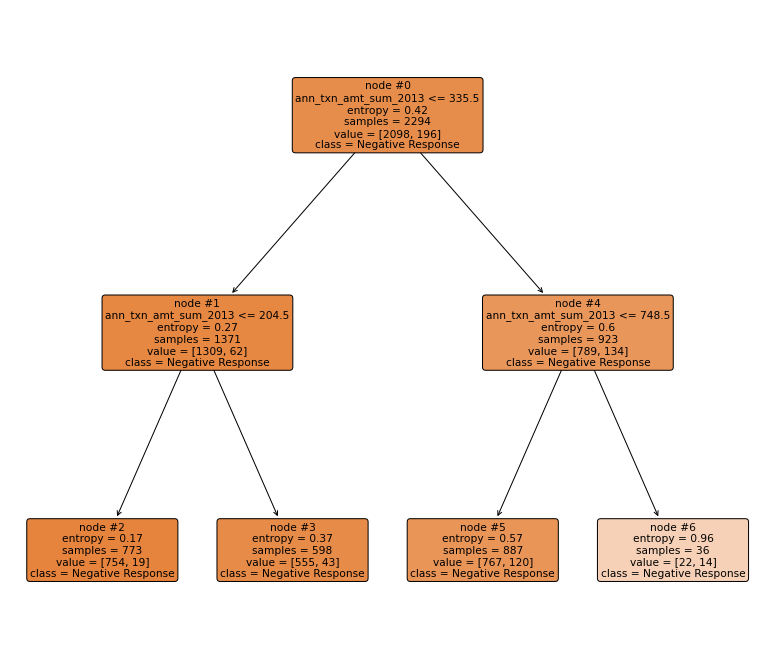

In [27]:
#single tree model to decide bin edges
binning(X_train_annual[["ann_txn_amt_sum_2013"]],y_train_annual["response"])

From the above tree model, I decide on the following bins:
1. Less than 204.5
2. Between 204.5 and 335.5
3. Between 335.5 and 748.5
4. Greater than 748.5

### **Population Distribution Calculation for 3rd feature**

In [28]:
#empty list to contain population distribution for each bin bucket
pd_1_f3 = []
pd_2_f3 = []
pd_3_f3 = []
pd_4_f3 = []

#empty list to contain corresponding responses for each bin bucket
responses_1_f3 = []
responses_2_f3 = []
responses_3_f3 = []
responses_4_f3 = []

for i in range(len(X_train_annual)):
    if X_train_annual['ann_txn_amt_sum_2013'][i] <=204.5:
        pd_1_f3.append(X_train_annual['ann_txn_amt_sum_2013'][i])
        responses_1_f3.append(y_train_annual['response'][i])
    elif X_train_annual['ann_txn_amt_sum_2013'][i] >204.5 and X_train_annual['ann_txn_amt_sum_2013'][i] <=335.5:
        pd_2_f3.append(X_train_annual['ann_txn_amt_sum_2013'][i])
        responses_2_f3.append(y_train_annual['response'][i])
    elif X_train_annual['ann_txn_amt_sum_2013'][i] >335.5 and X_train_annual['ann_txn_amt_sum_2013'][i] <=748.5:
        pd_3_f3.append(X_train_annual['ann_txn_amt_sum_2013'][i])
        responses_3_f3.append(y_train_annual['response'][i])
    else:
        pd_4_f3.append(X_train_annual['ann_txn_amt_sum_2013'][i])
        responses_4_f3.append(y_train_annual['response'][i])

In [29]:
#Population distribution calculation in percentage

population_distribution_f3= [] #population distribution for feature 3 in percentage

pd_1_per = (len(pd_1_f3)/len(X_train_annual)) * 100
population_distribution_f3.append(pd_1_per)
pd_2_per = (len(pd_2_f3)/len(X_train_annual)) * 100
population_distribution_f3.append(pd_2_per)
pd_3_per = (len(pd_3_f3)/len(X_train_annual)) * 100
population_distribution_f3.append(pd_3_per)
pd_4_per = (len(pd_4_f3)/len(X_train_annual)) * 100
population_distribution_f3.append(pd_4_per)

population_distribution_f3

[33.696599825632084, 26.068003487358325, 38.66608544027899, 1.5693112467306016]

### **Response Rate Calculation for 3rd feature**

In [30]:
#collecting positive response for each brackets

r1 = []
r2 = []
r3 = []
r4 = []

for i in range(len(responses_1_f3)):
    if responses_1_f3[i] == 1:
        r1.append(responses_1_f3[i])
        
for i in range(len(responses_2_f3)):
    if responses_2_f3[i] == 1:
        r2.append(responses_2_f3[i])

for i in range(len(responses_3_f3)):
    if responses_3_f3[i] == 1:
        r3.append(responses_3_f3[i])
        
for i in range(len(responses_4_f3)):
    if responses_4_f3[i] == 1:
        r4.append(responses_4_f3[i])

In [31]:
# calculating response rate in percentage

response_rate_f3= [] #response rate for feature 3 in %

r_1 = (len(r1)/len(responses_1_f3)) * 100
response_rate_f3.append(r_1)
r_2 = (len(r2)/len(responses_2_f3)) * 100
response_rate_f3.append(r_2)
r_3 = (len(r3)/len(responses_3_f3)) * 100
response_rate_f3.append(r_3)
r_4 = (len(r4)/len(responses_4_f3)) * 100
response_rate_f3.append(r_4)

response_rate_f3

[2.457956015523933, 7.190635451505016, 13.528748590755354, 38.88888888888889]

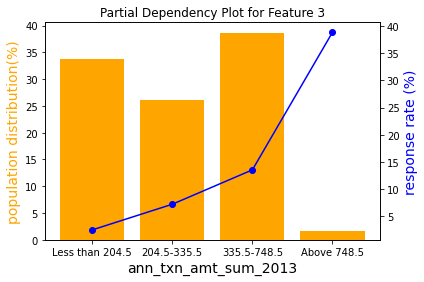

In [32]:
#Plotting the PDP Plot

xlabel_3 = ['Less than 204.5','204.5-335.5','335.5-748.5','Above 748.5']

# create figure and axis objects with subplots()
fig,ax = plt.subplots()
plt.title("Partial Dependency Plot for Feature 3")
# make a plot
ax.bar(xlabel_3,
        population_distribution_f3,
        color="orange")
# set x-axis label
ax.set_xlabel("ann_txn_amt_sum_2013", fontsize = 14)
# set y-axis label
ax.set_ylabel("population distribution(%)",
              color="orange",
              fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(xlabel_3, response_rate_f3 ,color="blue",marker="o")
ax2.set_ylabel("response rate (%)",color="blue",fontsize=14)
plt.show()

# save the plot as a file
fig.savefig('PDP for feature 3.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

Interpretation:

The plot increasea with increase in value of feature which means this has a strong impact on the model prediction as well. Hence with increase in sum of annual transcations in 2013, the predictions outcomes increases. This feature impacts upto 40% predicted response rate of the model with higher values in this feature.
    

## **4. PDP for 4th feature: "ann_txn_amt_sem_2014"**

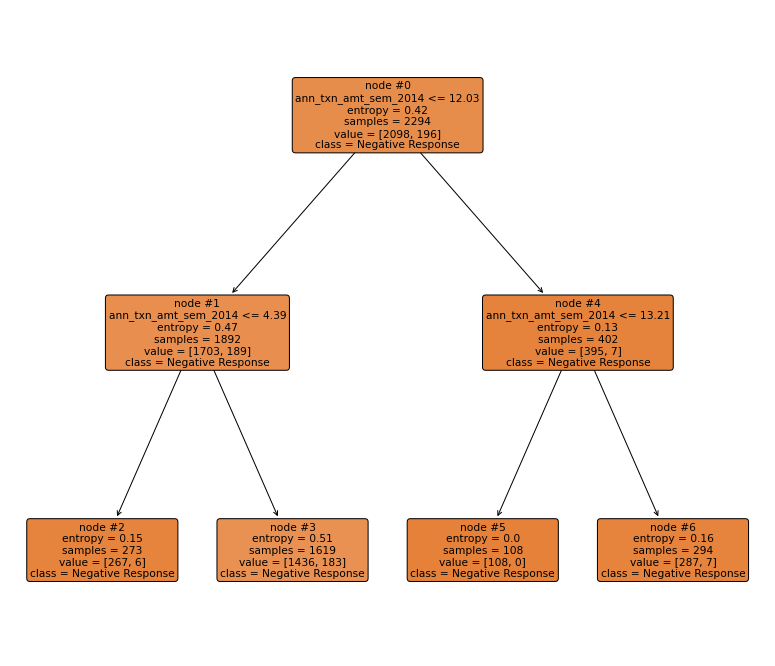

In [33]:
#single tree model to decide bin edges
binning(X_train_annual[["ann_txn_amt_sem_2014"]],y_train_annual["response"])

From the above tree model, I decide on the following bins:
1. Less than 4.39
2. Between 4.39 and 12.03
3. Between 12.03 and 13.21
4. Greater than 13.21

### **Population Distribution Calculation for 4th feature**

In [34]:
#empty list to contain population distribution for each bin bucket
pd_1_f4 = []
pd_2_f4 = []
pd_3_f4 = []
pd_4_f4 = []

#empty list to contain corresponding responses for each bin bucket
responses_1_f4 = []
responses_2_f4 = []
responses_3_f4 = []
responses_4_f4 = []

for i in range(len(X_train_annual)):
    if X_train_annual['ann_txn_amt_sem_2014'][i] <=4.39:
        pd_1_f4.append(X_train_annual['ann_txn_amt_sem_2014'][i])
        responses_1_f4.append(y_train_annual['response'][i])
    elif X_train_annual['ann_txn_amt_sem_2014'][i] >4.39 and X_train_annual['ann_txn_amt_sem_2014'][i] <=12.03:
        pd_2_f4.append(X_train_annual['ann_txn_amt_sem_2014'][i])
        responses_2_f4.append(y_train_annual['response'][i])
    elif X_train_annual['ann_txn_amt_sem_2014'][i] >12.03 and X_train_annual['ann_txn_amt_sem_2014'][i] <=13.21:
        pd_3_f4.append(X_train_annual['ann_txn_amt_sem_2014'][i])
        responses_3_f4.append(y_train_annual['response'][i])
    else:
        pd_4_f4.append(X_train_annual['ann_txn_amt_sem_2014'][i])
        responses_4_f4.append(y_train_annual['response'][i])

In [35]:
#Population distribution calculation in percentage

population_distribution_f4= [] #population distribution for feature 4 in percentage

pd_1_per = (len(pd_1_f4)/len(X_train_annual)) * 100
population_distribution_f4.append(pd_1_per)
pd_2_per = (len(pd_2_f4)/len(X_train_annual)) * 100
population_distribution_f4.append(pd_2_per)
pd_3_per = (len(pd_3_f4)/len(X_train_annual)) * 100
population_distribution_f4.append(pd_3_per)
pd_4_per = (len(pd_4_f4)/len(X_train_annual)) * 100
population_distribution_f4.append(pd_4_per)

population_distribution_f4

[11.900610287707062, 70.53182214472538, 4.751525719267654, 12.816041848299914]

### **Response Rate Calculation for 4th feature**

In [36]:
#collecting positive response for each brackets

r1 = []
r2 = []
r3 = []
r4 = []

for i in range(len(responses_1_f4)):
    if responses_1_f4[i] == 1:
        r1.append(responses_1_f4[i])
        
for i in range(len(responses_2_f4)):
    if responses_2_f4[i] == 1:
        r2.append(responses_2_f4[i])

for i in range(len(responses_3_f4)):
    if responses_3_f4[i] == 1:
        r3.append(responses_3_f4[i])
        
for i in range(len(responses_4_f4)):
    if responses_4_f4[i] == 1:
        r4.append(responses_4_f4[i])

In [37]:
# calculating response rate in percentage

response_rate_f4= [] #response rate for feature 4 in %

r_1 = (len(r1)/len(responses_1_f4)) * 100
response_rate_f4.append(r_1)
r_2 = (len(r2)/len(responses_2_f4)) * 100
response_rate_f4.append(r_2)
r_3 = (len(r3)/len(responses_3_f4)) * 100
response_rate_f4.append(r_3)
r_4 = (len(r4)/len(responses_4_f4)) * 100
response_rate_f4.append(r_4)

response_rate_f4

[2.197802197802198, 11.248454882571075, 0.9174311926605505, 2.380952380952381]

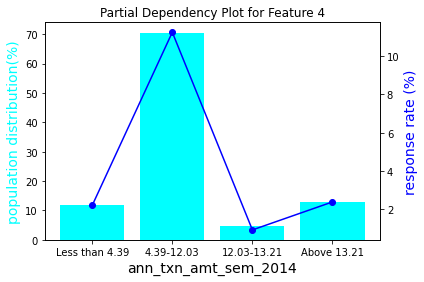

In [38]:
#Plotting the PDP Plot

xlabel_4 = ['Less than 4.39','4.39-12.03','12.03-13.21','Above 13.21']

# create figure and axis objects with subplots()
fig,ax = plt.subplots()
plt.title("Partial Dependency Plot for Feature 4")
# make a plot
ax.bar(xlabel_4,
        population_distribution_f4,
        color="cyan")
# set x-axis label
ax.set_xlabel("ann_txn_amt_sem_2014", fontsize = 14)
# set y-axis label
ax.set_ylabel("population distribution(%)",
              color="cyan",
              fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(xlabel_4, response_rate_f4 ,color="blue",marker="o")
ax2.set_ylabel("response rate (%)",color="blue",fontsize=14)
plt.show()

# save the plot as a file
fig.savefig('PDP for feature 4.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

Interpretation:

We see that the plot fluctuates and gets upto 10% predicted response rate when the feature value goes upto 12.03. The feature interacts with other features in some complex way to impact the prediction. But overall, it seems that the feature has a positive impact on the model predictions.

## **5. PDP for 5th feature: "ann_txn_amt_max_2014"**

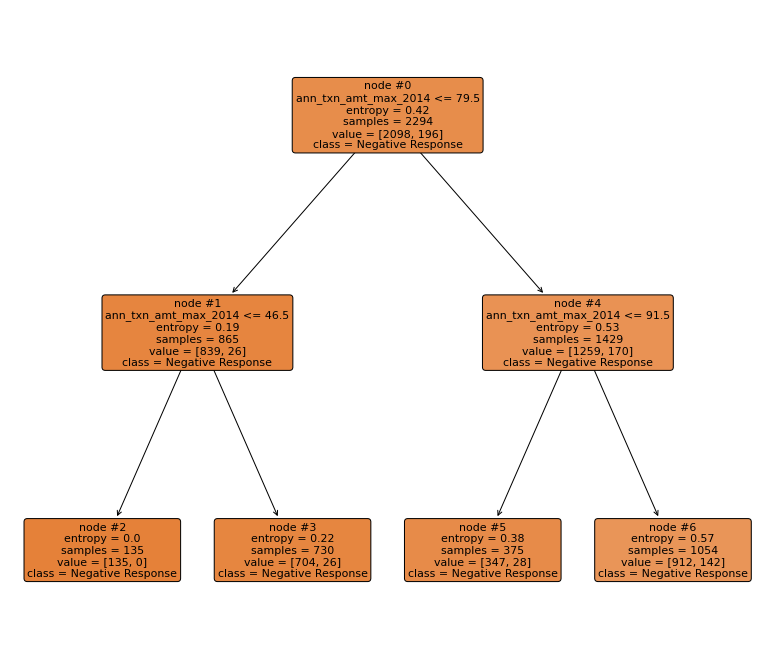

In [39]:
#single tree model to decide bin edges
binning(X_train_annual[["ann_txn_amt_max_2014"]],y_train_annual["response"])

From the above tree model, I decide on the following bins:
1. Less than 46.5
2. Between 46.5 and 79.5
3. Between 79.5 and 91.5
4. Greater than 91.5

### **Population Distribution Calculation for 5th feature**

In [40]:
#empty list to contain population distribution for each bin bucket
pd_1_f5 = []
pd_2_f5 = []
pd_3_f5 = []
pd_4_f5 = []

#empty list to contain corresponding responses for each bin bucket
responses_1_f5 = []
responses_2_f5 = []
responses_3_f5 = []
responses_4_f5 = []

for i in range(len(X_train_annual)):
    if X_train_annual['ann_txn_amt_max_2014'][i] <=46.5:
        pd_1_f5.append(X_train_annual['ann_txn_amt_max_2014'][i])
        responses_1_f5.append(y_train_annual['response'][i])
    elif X_train_annual['ann_txn_amt_max_2014'][i] >46.5 and X_train_annual['ann_txn_amt_max_2014'][i] <=79.5:
        pd_2_f5.append(X_train_annual['ann_txn_amt_sem_2014'][i])
        responses_2_f5.append(y_train_annual['response'][i])
    elif X_train_annual['ann_txn_amt_max_2014'][i] >79.5 and X_train_annual['ann_txn_amt_max_2014'][i] <=91.5:
        pd_3_f5.append(X_train_annual['ann_txn_amt_max_2014'][i])
        responses_3_f5.append(y_train_annual['response'][i])
    else:
        pd_4_f5.append(X_train_annual['ann_txn_amt_max_2014'][i])
        responses_4_f5.append(y_train_annual['response'][i])

In [41]:
#Population distribution calculation in percentage

population_distribution_f5= [] #population distribution for feature 5 in percentage

pd_1_per = (len(pd_1_f5)/len(X_train_annual)) * 100
population_distribution_f5.append(pd_1_per)
pd_2_per = (len(pd_2_f5)/len(X_train_annual)) * 100
population_distribution_f5.append(pd_2_per)
pd_3_per = (len(pd_3_f5)/len(X_train_annual)) * 100
population_distribution_f5.append(pd_3_per)
pd_4_per = (len(pd_4_f5)/len(X_train_annual)) * 100
population_distribution_f5.append(pd_4_per)

population_distribution_f5

[5.884917175239756, 31.82214472537053, 16.346992153443765, 45.94594594594595]

### **Response Rate Calculation for 5th feature**

In [42]:
#collecting positive response for each brackets

r1 = []
r2 = []
r3 = []
r4 = []

for i in range(len(responses_1_f5)):
    if responses_1_f5[i] == 1:
        r1.append(responses_1_f5[i])
        
for i in range(len(responses_2_f5)):
    if responses_2_f5[i] == 1:
        r2.append(responses_2_f5[i])

for i in range(len(responses_3_f5)):
    if responses_3_f5[i] == 1:
        r3.append(responses_3_f5[i])
        
for i in range(len(responses_4_f5)):
    if responses_4_f5[i] == 1:
        r4.append(responses_4_f5[i])

In [43]:
# calculating response rate in percentage

response_rate_f5= [] #response rate for feature 5 in %

r_1 = (len(r1)/len(responses_1_f5)) * 100
response_rate_f5.append(r_1)
r_2 = (len(r2)/len(responses_2_f5)) * 100
response_rate_f5.append(r_2)
r_3 = (len(r3)/len(responses_3_f5)) * 100
response_rate_f5.append(r_3)
r_4 = (len(r4)/len(responses_4_f5)) * 100
response_rate_f5.append(r_4)

response_rate_f5

[0.0, 3.5616438356164384, 7.466666666666668, 13.472485768500949]

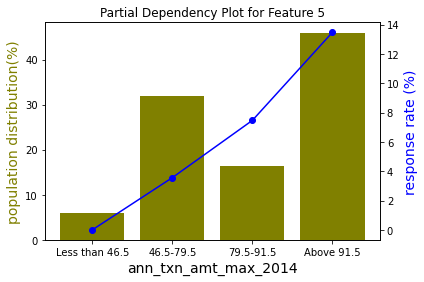

In [44]:
#Plotting the PDP Plot

xlabel_5 = ['Less than 46.5','46.5-79.5','79.5-91.5','Above 91.5']

# create figure and axis objects with subplots()
fig,ax = plt.subplots()
plt.title("Partial Dependency Plot for Feature 5")
# make a plot
ax.bar(xlabel_5,
        population_distribution_f5,
        color="olive")
# set x-axis label
ax.set_xlabel("ann_txn_amt_max_2014", fontsize = 14)
# set y-axis label
ax.set_ylabel("population distribution(%)",
              color="olive",
              fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(xlabel_5, response_rate_f5 ,color="blue",marker="o")
ax2.set_ylabel("response rate (%)",color="blue",fontsize=14)
plt.show()

# save the plot as a file
fig.savefig('PDP for feature 5.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

Interpretation:

The PDP plot for the feature is steeply increasing which means it has a very strong positive impact on the model predictions. The predicted response increases upto 14% with increase in the values of the feature. Hence the feature "ann_txn_max_2014" is a very good feature in impacting the model prediction.

### **Bonus Points**

[Text(0.5, 1.0, "Pearson's Correlation Plot")]

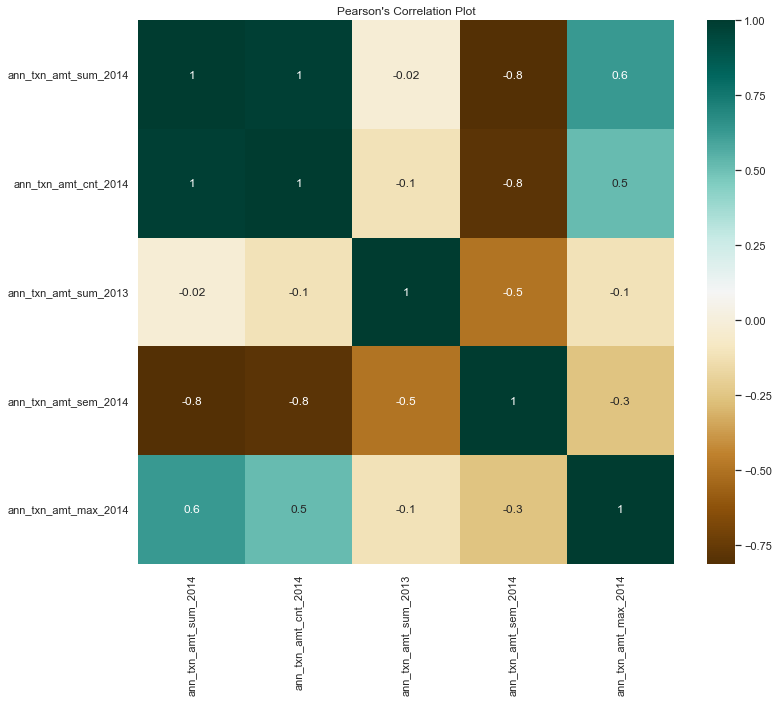

In [45]:
correlation_list = X_train_annual[["ann_txn_amt_sum_2014","ann_txn_amt_cnt_2014","ann_txn_amt_sum_2013","ann_txn_amt_sem_2014","ann_txn_amt_max_2014"]].corr()

import seaborn as sns
sns.set(rc={'figure.figsize':(12,10)})
sns.heatmap(correlation_list.corr(), annot = True, cbar_kws= {'orientation': 'vertical'},fmt='.1g', cmap='BrBG').set(title = "Pearson's Correlation Plot")